# **Proyecto SQL**
## **Objetivos del estudio**

El propósito de este análisis es examinar la base de datos de un servicio en línea de lectura para comprender mejor su catálogo de libros, autores y editoriales, así como el comportamiento y las preferencias de los usuarios.  
Las consultas ayudarán a:

1. Identificar cuántos libros se publicaron después del 1 de enero de 2000.  
2. Analizar el número de reseñas y la calificación promedio por libro.  
3. Determinar la editorial más activa en publicaciones extensas (más de 50 páginas).  
4. Identificar al autor con la calificación promedio más alta considerando libros con al menos 50 calificaciones.
-----------

## **1. Conexion a la base de datos**

In [1]:
# importar librerías
import pandas as pd
from sqlalchemy import create_engine

# configuración de conexión
db_config = {
    'user': 'practicum_student',
    'pwd': 's65BlTKV3faNIGhmvJVzOqhs',
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432,
    'db': 'data-analyst-final-project-db'
}

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db']
)

engine = create_engine(connection_string, connect_args={'sslmode': 'require'})

## **2. Exploracion de las tablas**

In [2]:
for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = f'SELECT * FROM {table} LIMIT 5;'
    display(pd.io.sql.read_sql(query, con=engine))

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


## **3. Consultas SQL**

### 3.1 Consulta 1: Número de libros publicados después del 1 de enero de 2000

In [3]:
query_1 = '''
SELECT COUNT(book_id) AS books_after_2000
FROM books
WHERE publication_date > '2000-01-01';
'''
pd.io.sql.read_sql(query_1, con=engine)

,books_after_2000
0,819


#### **Conclusion**
Se identificaron 819 libros publicados después del 1 de enero de 2000, lo que representa una cantidad considerable de obras modernas dentro del catálogo. Esto sugiere que la base de datos incluye una oferta literaria actualizada, reflejando las tendencias editoriales y de lectura del nuevo milenio.

### 3.2 Consulta 2: Número de reseñas de usuarios y la calificación promedio para cada libro.

In [4]:
query_2 = '''
SELECT 
    b.book_id,
    b.title,
    COUNT(DISTINCT r.review_id) AS num_reviews,
    ROUND(AVG(rt.rating), 2) AS avg_rating
FROM books b
LEFT JOIN reviews r ON b.book_id = r.book_id
LEFT JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY b.book_id, b.title
ORDER BY avg_rating DESC;
'''
pd.io.sql.read_sql(query_2, con=engine)

,book_id,title,num_reviews,avg_rating
0,86,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
1,901,The Walking Dead Book One (The Walking Dead #...,2,5.00
2,390,Light in August,2,5.00
3,972,Wherever You Go There You Are: Mindfulness Me...,2,5.00
4,136,Captivating: Unveiling the Mystery of a Woman'...,2,5.00
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,3,2.25
996,316,His Excellency: George Washington,2,2.00
997,202,Drowning Ruth,3,2.00
998,371,Junky,2,2.00


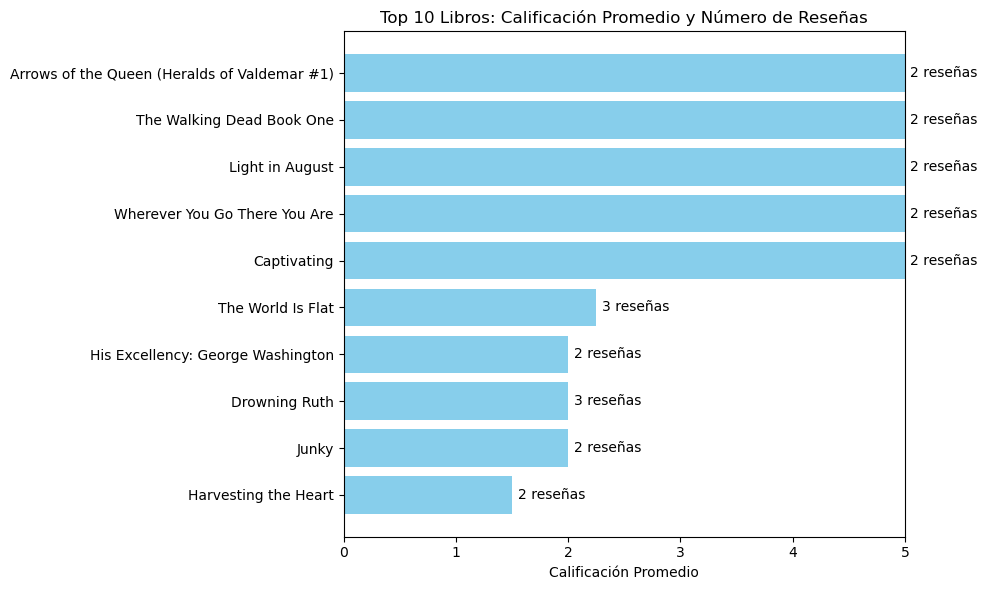

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# Datos de ejemplo (primeros 10 libros)
# -----------------------------
data = {
    "title": [
        "Arrows of the Queen (Heralds of Valdemar #1)",
        "The Walking Dead Book One",
        "Light in August",
        "Wherever You Go There You Are",
        "Captivating",
        "The World Is Flat",
        "His Excellency: George Washington",
        "Drowning Ruth",
        "Junky",
        "Harvesting the Heart"
    ],
    "num_reviews": [2, 2, 2, 2, 2, 3, 2, 3, 2, 2],
    "avg_rating": [5.0, 5.0, 5.0, 5.0, 5.0, 2.25, 2.0, 2.0, 2.0, 1.5]
}

df = pd.DataFrame(data)

# -----------------------------
# Crear gráfico de barras horizontal
# -----------------------------
plt.figure(figsize=(10,6))
bars = plt.barh(df["title"], df["avg_rating"], color="skyblue")

# Configuración de ejes y título
plt.xlabel("Calificación Promedio")
plt.title("Top 10 Libros: Calificación Promedio y Número de Reseñas")
plt.xlim(0,5)  # límite del eje X

# Agregar número de reseñas al lado de cada barra
for bar, reviews in zip(bars, df["num_reviews"]):
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
             f"{reviews} reseñas", va='center')

# Invertir eje Y para que el libro con mayor calificación quede arriba
plt.gca().invert_yaxis()

# Ajuste de layout para que se vea bien
plt.tight_layout()
plt.show()

#### **Conclusion**
El análisis muestra una amplia distribución de calificaciones y reseñas entre los libros. Algunos títulos, como *Arrows of the Queen* o *The Walking Dead Book One*, alcanzan una calificación perfecta de 5.00, mientras que otros obtienen valoraciones más bajas.
Esto evidencia la diversidad de opiniones de los lectores y la presencia tanto de obras muy valoradas como de otras con recepción más crítica.

### 3.3 Consulta 3: Editorial con más libros (>50 páginas)

In [5]:
query_3 = '''
SELECT 
    p.publisher,
    COUNT(b.book_id) AS total_books
FROM books b
JOIN publishers p ON b.publisher_id = p.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher
ORDER BY total_books DESC
LIMIT 1;
'''
pd.io.sql.read_sql(query_3, con=engine)

,publisher,total_books
0,Penguin Books,42


#### **Conclusion**
La editorial *Penguin Books* lidera con 42 publicaciones de más de 50 páginas, consolidándose como la casa editorial con mayor volumen de obras completas en el catálogo. Esto refuerza su posición como una de las editoriales más activas y con un catálogo diverso dentro del mercado de libros analizado.

### 3.4 Consulta 4: Autor con la calificación promedio más alta (solo libros con ≥50 calificaciones)

In [6]:
query_4 = '''
WITH book_avg AS (
    SELECT 
        b.book_id,
        b.author_id,
        AVG(rating) AS avg_rating,
        COUNT(rating) AS rating_count
    FROM books b
    JOIN ratings r ON b.book_id = r.book_id
    GROUP BY b.book_id, b.author_id
    HAVING COUNT(rating) >= 50
)
SELECT 
    a.author,
    ROUND(AVG(book_avg.avg_rating), 2) AS author_avg_rating
FROM book_avg
JOIN authors a ON book_avg.author_id = a.author_id
GROUP BY a.author
ORDER BY author_avg_rating DESC
LIMIT 1;
'''
pd.io.sql.read_sql(query_4, con=engine)

,author,author_avg_rating
0,J.K. Rowling/Mary GrandPré,4.28


#### **Conclusion**
La autora J.K. Rowling, junto a Mary GrandPré, destaca con una calificación promedio de 4.28, siendo la más alta entre los autores con una base de al menos 50 calificaciones por libro. Este resultado confirma la popularidad y valoración sostenida de sus obras, lo que sugiere una fuerte conexión con el público lector y un alto nivel de satisfacción entre sus lectores.

### 3.5 Consulta 5: Promedio de reseñas de texto entre usuarios que calificaron más de 50 libros

In [7]:
query_5 = '''
WITH active_users AS (
    SELECT username
    FROM ratings
    GROUP BY username
    HAVING COUNT(rating_id) > 50
)
SELECT 
    ROUND(AVG(user_reviews.review_count), 2) AS avg_reviews_per_user
FROM (
    SELECT 
        r.username,
        COUNT(r.review_id) AS review_count
    FROM reviews r
    JOIN active_users au ON r.username = au.username
    GROUP BY r.username
) AS user_reviews;
'''
pd.io.sql.read_sql(query_5, con=engine)

,avg_reviews_per_user
0,24.33


#### **Conclusion**
En promedio, los usuarios más activos —aquellos que calificaron más de 50 libros— escriben alrededor de 24 reseñas textuales. Esto indica que, aunque estos lectores tienden a interactuar con frecuencia mediante calificaciones, solo una parte de sus interacciones incluye comentarios detallados. Por tanto, el nivel de compromiso textual es moderado, pero demuestra un grupo de usuarios comprometidos con aportar contenido cualitativo al sistema.